## Overview
This notebook builds on the previous [Heat Equation](HeatEquationHessian.ipynb) notebook.  Here though, we will regularize the inverse problem and solve for the initial temperature.

In this example, we will again be using the `HeatEquation1d` class, which has functions `Jacobian`, `Solve`, and `NodeLocations`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as sklm 
import scipy.sparse as sp
import scipy.optimize as sopt

import sys
sys.path.append("../CommonTools")

from HeatEquation import HeatEquation1d


## Set up the heat equation solver

In [2]:
Nx = 100
dt = 1e-4 
endTime = 0.02 # This is the "observation time"

heat = HeatEquation1d(Nx, dt)
nodeLocs = heat.NodeLocations()

# Set up the initial condition
stepLeft = 0.4
stepRight = 0.6

u0 = np.zeros((Nx,))
u0[(nodeLocs>=stepLeft)&(nodeLocs<=stepRight)] = 1.0

u = heat.Solve(u0, endTime)

## Extract the data and define the linear model

In [3]:
data = u[:,-1]

noiseStd = 1e-3
noiseVar = noiseStd**2

A = heat.Jacobian(endTime)

## L2 regularization

> **Question 1:** What is the form of the regularized objective function?

> **Question 2:** Can we solve the regularized objective analytically?

> **Question 3:** How does the regularized Hessian compare with the unregularized spectrum?

## Solution

In [8]:
W1 = (1.0/noiseVar)*np.eye(Nx)

W2 = (1.0/noiseVar)*np.eye(Nx)
W2[0:50,0:50] = 0.0 * np.eye(50)

alpha = 1e-8
B = alpha*np.eye(Nx)

H_regularized = A.T @ W1 @ A + B
H2_regularized = A.T @ W2 @ A + B
H_before = A.T @ W1 @ A

rhs1 = A.T @ W1 @ data
rhs2 = A.T @ W2 @ data

sol1 = np.linalg.solve(H_regularized, rhs1)
sol2 = np.linalg.solve(H2_regularized, rhs2)


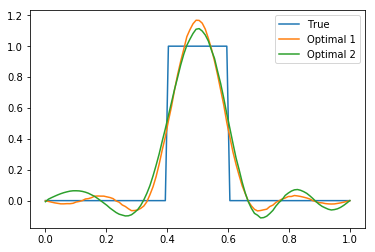

In [9]:
plt.plot(nodeLocs, u[:,0],label='True')
plt.plot(nodeLocs, sol1, label='Optimal 1')
plt.plot(nodeLocs, sol2, label='Optimal 2')
plt.legend();

In [10]:
lam_reg, v = np.linalg.eigh(H_regularized)
lam_before, v_before = np.linalg.eigh(H_before)

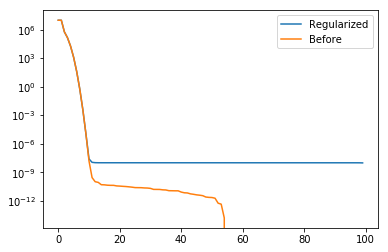

In [11]:
plt.semilogy(np.flip(lam_reg),label='Regularized')
plt.semilogy(np.flip(lam_before), label='Before')
plt.legend()